In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold 

pd.set_option('display.max_columns', None)

C:\Users\ABHIRAM\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# NO (Not Outs): This column indicates the number of times the player remained not out after completing their
# HS (Highest Score)
# Avg (Average): The "Average" column calculates the player's batting average, which is the total runs scored
# BF (Balls Faced): This column indicates the total number of balls faced by the player across all their innings in the IPL season. It offers insight into the
# SR strike rate

In [3]:
df_atbs= pd.read_csv("All-Time-Best-Batsman.csv")
df_atbs

,POS,Player,Team,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Virat Kohli,RCB,237,229,34,7263,113,37.25,5586,130.02,7,50,643,234
1,2,Shikhar Dhawan,PKBS,217,216,29,6617,106*,35.39,5203,127.18,2,50,750,148
2,3,David Warner,DC,176,176,22,6397,126,41.54,4572,139.92,4,60,646,226
3,4,Rohit Sharma,MI,243,238,28,6211,109*,29.58,4776,130.05,1,42,554,257
4,5,Suresh Raina,CSK,205,200,30,5528,100*,32.52,4042,136.76,1,39,506,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,131,Gurkeerat Mann Singh,RCB,39,32,8,511,65,21.29,422,121.09,0,2,55,11
131,132,Sai Sudharsan,GT,13,13,2,507,96,46.09,370,137.03,0,4,47,15
132,133,Owais Shah,RR,23,22,7,506,76,33.73,389,130.08,0,4,34,23
133,134,Paul Valthaty,PBKS,23,23,1,505,120,22.95,418,120.81,1,2,61,20


In [4]:
df_atbs.shape

(135, 15)

In [5]:
df_atbs=df_atbs.drop(["POS"],axis=1)

In [6]:
df_atbs.isna().sum()

Player    0
Team      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64

In [7]:
df_atbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  135 non-null    object 
 1   Team    135 non-null    object 
 2   Mat     135 non-null    int64  
 3   Inns    135 non-null    int64  
 4   NO      135 non-null    int64  
 5   Runs    135 non-null    int64  
 6   HS      135 non-null    object 
 7   Avg     135 non-null    float64
 8   BF      135 non-null    int64  
 9   SR      135 non-null    float64
 10  100     135 non-null    int64  
 11  50      135 non-null    int64  
 12  4s      135 non-null    int64  
 13  6s      135 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 14.9+ KB


In [8]:
df_atbs.columns= [e.lower().replace(" ",'_') for e in df_atbs.columns]

In [9]:
# hs column has removing them and converting the column into int from str
df_atbs['hs']=df_atbs['hs'].str.replace(r'\*', '', regex=True)
df_atbs['hs']=df_atbs['hs'].astype('int64')
df_atbs['hs']

0      113
1      106
2      126
3      109
4      100
      ... 
130     65
131     96
132     76
133    120
134     56
Name: hs, Length: 135, dtype: int64

In [10]:
df_atbs.max()

player    Yuvraj Singh
team               SRH
mat                250
inns               238
no                  87
runs              7263
hs                 175
avg              48.63
bf                5586
sr               174.0
100                  7
50                  60
4s                 750
6s                 357
dtype: object

In [11]:
df_atbs.team.value_counts()

team
CSK     18
MI      15
RR      14
KKR     14
DC      13
RCB     12
PBKS    12
SRH     10
LSG      8
GT       8
PWI      4
GL       3
RPS      3
PKBS     1
Name: count, dtype: int64

In [12]:
# finding who is in pkbs
df_atbs[df_atbs['team'] == 'PKBS']

,player,team,mat,inns,no,runs,hs,avg,bf,sr,100,50,4s,6s
1,Shikhar Dhawan,PKBS,217,216,29,6617,106,35.39,5203,127.18,2,50,750,148


In [13]:
# it is pbks so changing renaming to pbks from pkbs
df_atbs['team'] = df_atbs['team'].str.replace('PKBS','PBKS')

In [14]:
df_atbs

,player,team,mat,inns,no,runs,hs,avg,bf,sr,100,50,4s,6s
0,Virat Kohli,RCB,237,229,34,7263,113,37.25,5586,130.02,7,50,643,234
1,Shikhar Dhawan,PBKS,217,216,29,6617,106,35.39,5203,127.18,2,50,750,148
2,David Warner,DC,176,176,22,6397,126,41.54,4572,139.92,4,60,646,226
3,Rohit Sharma,MI,243,238,28,6211,109,29.58,4776,130.05,1,42,554,257
4,Suresh Raina,CSK,205,200,30,5528,100,32.52,4042,136.76,1,39,506,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Gurkeerat Mann Singh,RCB,39,32,8,511,65,21.29,422,121.09,0,2,55,11
131,Sai Sudharsan,GT,13,13,2,507,96,46.09,370,137.03,0,4,47,15
132,Owais Shah,RR,23,22,7,506,76,33.73,389,130.08,0,4,34,23
133,Paul Valthaty,PBKS,23,23,1,505,120,22.95,418,120.81,1,2,61,20


In [15]:
df_atbs[df_atbs['player'] == 'MS Dhoni']


,player,team,mat,inns,no,runs,hs,avg,bf,sr,100,50,4s,6s
6,MS Dhoni,CSK,250,218,87,5082,84,38.79,3739,135.92,0,24,349,239


In [16]:
df_atbs[df_atbs['player'] == 'Shikhar Dhawan']


,player,team,mat,inns,no,runs,hs,avg,bf,sr,100,50,4s,6s
1,Shikhar Dhawan,PBKS,217,216,29,6617,106,35.39,5203,127.18,2,50,750,148


<function matplotlib.pyplot.show(close=None, block=None)>

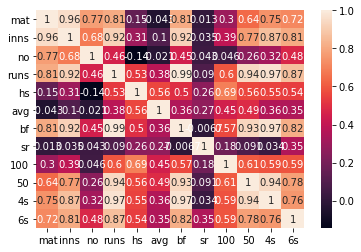

In [17]:
# numeric data
df_atbs_n=df_atbs.select_dtypes(include='number')

correlations_matrix=df_atbs_n.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show

In [18]:
# batsman who played most matches

df_atbs[df_atbs.mat == df_atbs.mat.max()]

,player,team,mat,inns,no,runs,hs,avg,bf,sr,100,50,4s,6s
6,MS Dhoni,CSK,250,218,87,5082,84,38.79,3739,135.92,0,24,349,239


<AxesSubplot:xlabel='player', ylabel='no'>

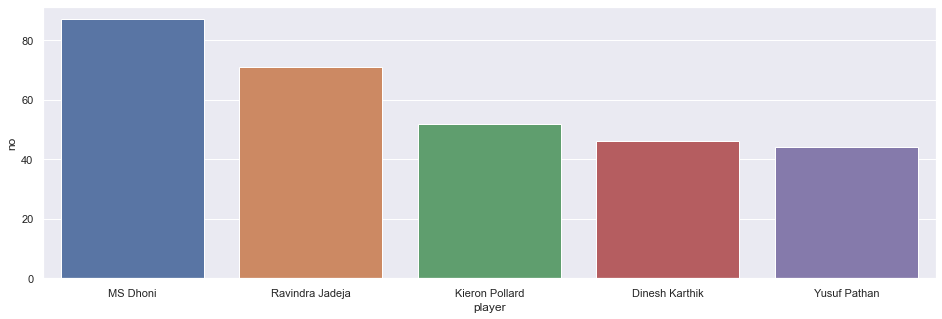

In [19]:
# plotting the batsmen who are having all time runs
sns.set(rc={'figure.figsize':(16,5)})
g = df_atbs.groupby('player', as_index=False)['no'].sum().sort_values(by='no', ascending=False).head(5)
sns.barplot(data=g, x='player', y='no')

<AxesSubplot:xlabel='player', ylabel='runs'>

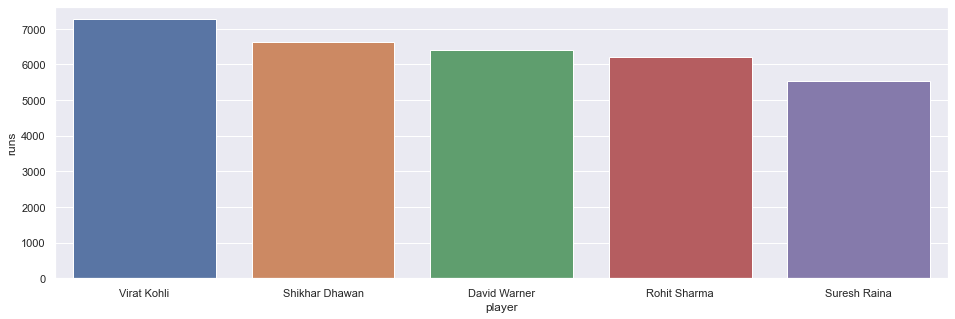

In [20]:
# plotting the batsmen who are having all time runs
sns.set(rc={'figure.figsize':(16,5)})
g = df_atbs.groupby('player', as_index=False)['runs'].sum().sort_values(by='runs', ascending=False).head(5)
sns.barplot(data=g, x='player', y='runs')

<AxesSubplot:xlabel='player', ylabel='avg'>

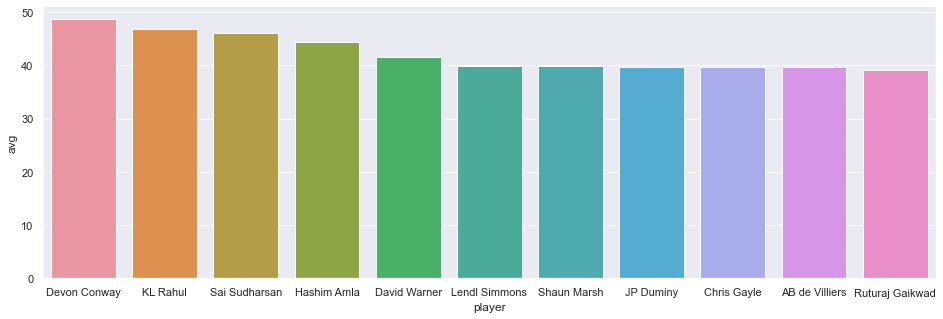

In [21]:
# plotting the batsmen with avg
sns.set(rc={'figure.figsize':(16,5)})
g = df_atbs.groupby('player', as_index=False)['avg'].sum().sort_values(by='avg', ascending=False).head(11)
sns.barplot(data=g, x='player', y='avg')

# selecting 50 players each in no,runs and avg stored in no_runs_avg

In [22]:
no=df_atbs.nlargest(50, 'no')
avg=df_atbs.nlargest(50, 'avg')
runs=df_atbs.nlargest(50, 'runs')

no_runs_avg= pd.concat([no,runs,avg])
no_runs_avg=no_runs_avg.drop_duplicates().reset_index(drop=True)

# scraping the data of 2023 players to find the retired players

In [23]:
url="https://www.crictracker.com/indian-premier-league-ipl-teams-and-squads/"
soup=BeautifulSoup(requests.get(url).content,"html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <title>
   IPL 2023 Teams and Squads | IPL 2023 teams &amp; players list
  </title>
  <link href="https://www.crictracker.com/indian-premier-league-ipl-teams-and-squads/" rel="canonical"/>
  <link href="https://www.crictracker.com/indian-premier-league-ipl-teams-and-squads/?amp=1" id="ampURL" rel="amphtml"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=2" name="viewport"/>
  <meta content="CricTracker" name="Author"/>
  <meta content="en_US" property="og:locale"/>
  <meta content="IPL 2023 Squads and Teams: Check out the list of Updated Teams that will compete in the Indian Premier League (IPL) 2023. Here's the full player list of each team, including reserves and substitutes." name="description"/>
  <meta content="IPL 2023 Squad" name="keywords"/>
  <meta content="Follow, Index" name="robots"/>
  <meta content="IPL 2023 Teams and Squads | I

In [24]:
url = 'https://www.crictracker.com/indian-premier-league-ipl-teams-and-squads/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
tr_elements = soup.select("tr")
tr_elements

[<tr height="17">
 <td class="xl35" height="17" width="159"><b>PLAYER</b></td>
 <td class="xl35" width="148"><b>ROLE</b></td>
 <td class="xl35" width="143"><b>PRICE</b></td>
 </tr>,
 <tr height="17">
 <td class="xl36" height="17">MS Dhoni (c)</td>
 <td class="xl36">Batter/Wicket-keeper</td>
 <td class="xl36">12 crore</td>
 </tr>,
 <tr height="17">
 <td class="xl36" height="17">Devon Conway</td>
 <td class="xl36">Batter</td>
 <td class="xl36">1 crore</td>
 </tr>,
 <tr height="17">
 <td class="xl36" height="17">Ruturaj Gaikwad</td>
 <td class="xl36">Batter</td>
 <td class="xl36">6 crore</td>
 </tr>,
 <tr height="17">
 <td class="xl36" height="17">Ambati Rayudu</td>
 <td class="xl36">Batter/Wicket-keeper</td>
 <td class="xl36">6.75 crore</td>
 </tr>,
 <tr height="17">
 <td class="xl36" height="17">Subhranshu Senapati</td>
 <td class="xl36">Batter</td>
 <td class="xl36">20 lakh</td>
 </tr>,
 <tr height="17">
 <td class="xl36" height="17">Moeen Ali</td>
 <td class="xl36">All-Rounder</td>
 <

In [25]:
# Extract and print the text from each <td> element
player= []
for tr in tr_elements:
    tr_text = tr.get_text(strip=False)  
    print(tr_text)
    player.append(tr_text)
player


PLAYER
ROLE
PRICE


MS Dhoni (c)
Batter/Wicket-keeper
12 crore


Devon Conway
Batter
1 crore


Ruturaj Gaikwad
Batter
6 crore


Ambati Rayudu
Batter/Wicket-keeper
6.75 crore


Subhranshu Senapati
Batter
20 lakh


Moeen Ali
All-Rounder
8 crore


Shivam Dube
All-Rounder
4 crore


Rajvardhan Hangargekar
Bowler
1.5 crore


Dwaine Pretorius
All-Rounder
50 lakh


Mitchell Santner
Bowler
1.9 crore


Ravindra Jadeja
All-Rounder
16 crore


Tushar Deshpande
Bowler
20 lakh


Akash Singh
Bowler
20 lakh


Matheesha Pathirana
Bowler
20 lakh


Simarjeet Singh
Bowler
20 lakh


Deepak Chahar
Bowler
14 crore


Prashant Solanki
Bowler
1.2 crore


Maheesh Theekshana
Bowler
70 lakh


Ajinkya Rahane
Batter
50 lakh


Ben Stokes
All-Rounder
16.25 crore


Shaik Rasheed
Batter
20 lakh


Nishant Sindhu
All-Rounder
60 lakh


Sisanda Magala
Bowler
50 lakh


Ajay Mandal
All-Rounder
20 lakh


Bhagath Varma
All-Rounder
20 lakh


Injured Player
Replacement


Kyle Jamieson
Sisanda Magala


Mukesh Choudhary
Akash Singh

['\nPLAYER\nROLE\nPRICE\n',
 '\nMS Dhoni (c)\nBatter/Wicket-keeper\n12 crore\n',
 '\nDevon Conway\nBatter\n1 crore\n',
 '\nRuturaj Gaikwad\nBatter\n6 crore\n',
 '\nAmbati Rayudu\nBatter/Wicket-keeper\n6.75 crore\n',
 '\nSubhranshu Senapati\nBatter\n20 lakh\n',
 '\nMoeen Ali\nAll-Rounder\n8 crore\n',
 '\nShivam Dube\nAll-Rounder\n4 crore\n',
 '\nRajvardhan Hangargekar\nBowler\n1.5 crore\n',
 '\nDwaine Pretorius\nAll-Rounder\n50 lakh\n',
 '\nMitchell Santner\nBowler\n1.9 crore\n',
 '\nRavindra Jadeja\nAll-Rounder\n16 crore\n',
 '\nTushar Deshpande\nBowler\n20 lakh\n',
 '\nAkash Singh\nBowler\n20 lakh\n',
 '\nMatheesha Pathirana\nBowler\n20 lakh\n',
 '\nSimarjeet Singh\nBowler\n20 lakh\n',
 '\nDeepak Chahar\nBowler\n14 crore\n',
 '\nPrashant Solanki\nBowler\n1.2 crore\n',
 '\nMaheesh Theekshana\nBowler\n70 lakh\n',
 '\nAjinkya Rahane\nBatter\n50 lakh\n',
 '\nBen Stokes\nAll-Rounder\n16.25 crore\n',
 '\nShaik Rasheed\nBatter\n20 lakh\n',
 '\nNishant Sindhu\nAll-Rounder\n60 lakh\n',
 '\nSis

In [26]:
player

['\nPLAYER\nROLE\nPRICE\n',
 '\nMS Dhoni (c)\nBatter/Wicket-keeper\n12 crore\n',
 '\nDevon Conway\nBatter\n1 crore\n',
 '\nRuturaj Gaikwad\nBatter\n6 crore\n',
 '\nAmbati Rayudu\nBatter/Wicket-keeper\n6.75 crore\n',
 '\nSubhranshu Senapati\nBatter\n20 lakh\n',
 '\nMoeen Ali\nAll-Rounder\n8 crore\n',
 '\nShivam Dube\nAll-Rounder\n4 crore\n',
 '\nRajvardhan Hangargekar\nBowler\n1.5 crore\n',
 '\nDwaine Pretorius\nAll-Rounder\n50 lakh\n',
 '\nMitchell Santner\nBowler\n1.9 crore\n',
 '\nRavindra Jadeja\nAll-Rounder\n16 crore\n',
 '\nTushar Deshpande\nBowler\n20 lakh\n',
 '\nAkash Singh\nBowler\n20 lakh\n',
 '\nMatheesha Pathirana\nBowler\n20 lakh\n',
 '\nSimarjeet Singh\nBowler\n20 lakh\n',
 '\nDeepak Chahar\nBowler\n14 crore\n',
 '\nPrashant Solanki\nBowler\n1.2 crore\n',
 '\nMaheesh Theekshana\nBowler\n70 lakh\n',
 '\nAjinkya Rahane\nBatter\n50 lakh\n',
 '\nBen Stokes\nAll-Rounder\n16.25 crore\n',
 '\nShaik Rasheed\nBatter\n20 lakh\n',
 '\nNishant Sindhu\nAll-Rounder\n60 lakh\n',
 '\nSis

In [27]:
# Split the strings by "\n" and create a list of lists
player = [string.replace("\n\n", "\n") for string in player]
split_data = [item.split("\n") for item in player]

squad_23 = pd.DataFrame(split_data)
squad_23.columns = ["Column3", "player","role","price","Column3"]

In [28]:
# dropping rows with index
squad_23 = squad_23.drop(0)

# dropping columns with name
squad_23= squad_23.drop(squad_23["Column3"], axis=1)
squad_23 = squad_23[squad_23['player']!= 'PLAYER']
pd.set_option('display.max_rows', None)
squad_23=squad_23.reset_index(drop=True)

# squad_23 - is the df of the data of 2023 recent players(scraped data)

In [29]:
squad_23= squad_23.replace({'': np.nan, ' ': np.nan})
# Drop rows with NaN values
squad_23 = squad_23.dropna()
squad_23=squad_23.reset_index(drop=True)
squad_23

,player,role,price
0,MS Dhoni (c),Batter/Wicket-keeper,12 crore
1,Devon Conway,Batter,1 crore
2,Ruturaj Gaikwad,Batter,6 crore
3,Ambati Rayudu,Batter/Wicket-keeper,6.75 crore
4,Subhranshu Senapati,Batter,20 lakh
5,Moeen Ali,All-Rounder,8 crore
6,Shivam Dube,All-Rounder,4 crore
7,Rajvardhan Hangargekar,Bowler,1.5 crore
8,Dwaine Pretorius,All-Rounder,50 lakh
9,Mitchell Santner,Bowler,1.9 crore


In [30]:
squad_23.iloc[[194]].values

array([['Virat Kohli\xa0', 'Batter', '15 crore']], dtype=object)

In [31]:
squad_23.values

array([['MS Dhoni (c)', 'Batter/Wicket-keeper', '12 crore'],
       ['Devon Conway', 'Batter', '1 crore'],
       ['Ruturaj Gaikwad', 'Batter', '6 crore'],
       ['Ambati Rayudu', 'Batter/Wicket-keeper', '6.75 crore'],
       ['Subhranshu Senapati', 'Batter', '20 lakh'],
       ['Moeen Ali', 'All-Rounder', '8 crore'],
       ['Shivam Dube', 'All-Rounder', '4 crore'],
       ['Rajvardhan Hangargekar', 'Bowler', '1.5 crore'],
       ['Dwaine Pretorius', 'All-Rounder', '50 lakh'],
       ['Mitchell Santner', 'Bowler', '1.9 crore'],
       ['Ravindra Jadeja', 'All-Rounder', '16 crore'],
       ['Tushar Deshpande', 'Bowler', '20 lakh'],
       ['Akash Singh', 'Bowler', '20 lakh'],
       ['Matheesha Pathirana', 'Bowler', '20 lakh'],
       ['Simarjeet Singh', 'Bowler', '20 lakh'],
       ['Deepak Chahar', 'Bowler', '14 crore'],
       ['Prashant Solanki', 'Bowler', '1.2 crore'],
       ['Maheesh Theekshana', 'Bowler', '70 lakh'],
       ['Ajinkya Rahane', 'Batter', '50 lakh'],
       ['Ben

In [32]:
# removing before and after \xa0 in the values
squad_23=squad_23.replace(u'\xa0', u'', regex=True)
s23=squad_23.replace(r' \(.*\)','', regex=True)
s23

,player,role,price
0,MS Dhoni,Batter/Wicket-keeper,12 crore
1,Devon Conway,Batter,1 crore
2,Ruturaj Gaikwad,Batter,6 crore
3,Ambati Rayudu,Batter/Wicket-keeper,6.75 crore
4,Subhranshu Senapati,Batter,20 lakh
5,Moeen Ali,All-Rounder,8 crore
6,Shivam Dube,All-Rounder,4 crore
7,Rajvardhan Hangargekar,Bowler,1.5 crore
8,Dwaine Pretorius,All-Rounder,50 lakh
9,Mitchell Santner,Bowler,1.9 crore


# convert lakh and crore in numbers

In [33]:
s23['price']=s23['price'].str.lower()
s23['price']=s23['price'].replace({" lakh":"*1e6"," crore":"*1e7"}, regex=True).map(pd.eval).astype(int)
s23

,player,role,price
0,MS Dhoni,Batter/Wicket-keeper,120000000
1,Devon Conway,Batter,10000000
2,Ruturaj Gaikwad,Batter,60000000
3,Ambati Rayudu,Batter/Wicket-keeper,67500000
4,Subhranshu Senapati,Batter,20000000
5,Moeen Ali,All-Rounder,80000000
6,Shivam Dube,All-Rounder,40000000
7,Rajvardhan Hangargekar,Bowler,15000000
8,Dwaine Pretorius,All-Rounder,50000000
9,Mitchell Santner,Bowler,19000000


In [34]:
s23['amount_usd_million'] =s23['price'].astype(float)/1000000
s23

,player,role,price,amount_usd_million
0,MS Dhoni,Batter/Wicket-keeper,120000000,120.0
1,Devon Conway,Batter,10000000,10.0
2,Ruturaj Gaikwad,Batter,60000000,60.0
3,Ambati Rayudu,Batter/Wicket-keeper,67500000,67.5
4,Subhranshu Senapati,Batter,20000000,20.0
5,Moeen Ali,All-Rounder,80000000,80.0
6,Shivam Dube,All-Rounder,40000000,40.0
7,Rajvardhan Hangargekar,Bowler,15000000,15.0
8,Dwaine Pretorius,All-Rounder,50000000,50.0
9,Mitchell Santner,Bowler,19000000,19.0


In [35]:
s23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player              244 non-null    object 
 1   role                244 non-null    object 
 2   price               244 non-null    int32  
 3   amount_usd_million  244 non-null    float64
dtypes: float64(1), int32(1), object(2)
memory usage: 6.8+ KB


In [36]:
squad_23.iloc[[194]].values

array([['Virat Kohli', 'Batter', '15 crore']], dtype=object)

In [37]:
# squad_23[squad_23['player'] == 'Virat Kohli']
# squad_23.loc[squad_23['player'] == 'Virat Kohli']

# compraring the 2 df's and printing the data these players are not retired
## fil_df has all the players who are not retired 
## fil_df players are the top players


In [38]:
# https://datascience.stackexchange.com/questions/107257/i-have-two-dataframes-df-and-df1-i-want-to-check-if-df1-columns-values-is-pres
fil_df = no_runs_avg[no_runs_avg["player"].isin(s23["player"])]

In [39]:
fil_df.to_csv('Top_nonretired.csv', index=False)

In [40]:
fil_df.shape

(42, 14)

# finding players not retained with retained data

In [41]:
url="https://www.iplt20.com/news/3849/tata-ipl-2023-player-retentions-list"
soup1=BeautifulSoup(requests.get(url).content,"html.parser")
print(soup1.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <script>
   var title = "TATA IPL 2023 Player Retentions List";
    window.dataLayer = window.dataLayer || [];
    window.dataLayer.push({
        'client_ga_id': '308089989',
        'content_type': title,
        'platform_type': 'web',
        'environment': 'production',
    });
  </script>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-PQ2QKF4');
  </script>
  <!-- End Google Tag Manager -->
  <title data-page-title="TATA IPL 2023 Player Retentions List" id="page_title">
   TATA IPL 2023 Player Retentions List
  </title>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta conten

In [42]:
import re

In [43]:
Retained_Players=[]
for l in soup1.find_all('strong',string = re.compile('Retained Players')):
    Retained_Players.append(l.parent.get_text().strip())
Retained_Players

['Retained Players:\xa0Ambati Rayudu, Deepak Chahar, Devon Conway*, Dwaine Pretorius*, Maheesh Theekshana*, Matheesha Pathirana*, Mitchell Santner*, Moeen Ali*, MS Dhoni, Mukesh Choudhary, Prashant Solanki, Rajvardhan Hangargekar, Ravindra Jadeja, Ruturaj\xa0 Gaikwad, Shivam Dube, Simarjeet Singh, Subhranshu Senapati, Tushar Deshpande',
 'Retained Players:\xa0Aman Khan (T), Anrich Nortje*, Axar Patel, Chetan Sakariya, David Warner*, Kamlesh Nagarkoti, Kuldeep Yadav, Lalit Yadav, Lungisani Ngidi*, Mitchell Marsh*, Mustafizur Rahman*, Pravin Dubey, Prithvi Shaw, Ripal Patel, Rishabh Pant, Rovman Powell*, Sarfaraz Khan, Syed Khaleel Ahmed, Vicky Ostwal, Yash Dhull',
 'Retained Players:\xa0Abhinav Sadarangani, Alzarri Joseph*, B. Sai Sudharsan, Darshan Nalkande, David Miller*, Hardik Pandya, Jayant Yadav, Matthew Wade*, Mohammad Shami, Noor Ahmad*, Pradeep Sangwan, R. Sai Kishore, Rahul Tewatia, Rashid Khan*, Shubman Gill, Vijay Shankar, Wriddhiman Saha, Yash Dayal',
 'Retained Players:\xa

In [44]:
rp=[item for items in Retained_Players for item in items.split(",")]

In [45]:
rp=pd.DataFrame(rp)
rp.columns = ["player"]
rp

,player
0,Retained Players: Ambati Rayudu
1,Deepak Chahar
2,Devon Conway*
3,Dwaine Pretorius*
4,Maheesh Theekshana*
5,Matheesha Pathirana*
6,Mitchell Santner*
7,Moeen Ali*
8,MS Dhoni
9,Mukesh Choudhary


# Below df is the data of all the retained players

In [46]:
# final df of retained players
rp=rp.replace(u'\xa0', u'', regex=True)
rp=rp.replace(r'.*:|\*| \(.*\)| ','', regex=True)
rp

,player
0,AmbatiRayudu
1,DeepakChahar
2,DevonConway
3,DwainePretorius
4,MaheeshTheekshana
5,MatheeshaPathirana
6,MitchellSantner
7,MoeenAli
8,MSDhoni
9,MukeshChoudhary


In [47]:
fil_df=fil_df.replace(r' ','', regex=True)

# Players to bid 
## fil_df and rp are merged so that we can get the players who are not retained

In [48]:
t_df=fil_df.merge(rp, on=['player'], how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
# t_df=t_df.reset_index(drop=True)
t_df

,player,team,mat,inns,no,runs,hs,avg,bf,sr,100,50,4s,6s
6,PiyushChawla,MI,174,86,34,609,24,11.71,548,111.13,0,0,55,19
12,ManishPandey,DC,170,158,27,3808,114,29.07,3148,120.97,1,22,333,108
22,AjinkyaRahane,CSK,172,159,17,4400,105,30.99,3565,123.42,2,30,455,96
24,KaneWilliamson,GT,77,75,17,2101,89,36.22,1667,126.03,0,18,182,64
28,MayankAgarwal,SRH,123,117,4,2597,106,22.98,1943,133.66,1,13,255,97
33,SaiSudharsan,GT,13,13,2,507,96,46.09,370,137.03,0,4,47,15
35,TilakVarma,MI,25,25,6,740,84,38.95,512,144.53,0,3,55,39
36,HeinrichKlaasen,SRH,19,17,3,514,104,36.71,310,165.81,1,2,37,26
39,JasonRoy,KKR,21,21,2,614,91,32.32,443,138.60,0,4,75,21


In [49]:
s=s23.replace(r' ','', regex=True)
s=s[s["player"].isin(t_df["player"])]
# s=s.reset_index(drop=True)
s

,player,role,price,amount_usd_million
18,AjinkyaRahane,Batter,50000000,50.0
48,ManishPandey,Batter,24000000,24.0
54,SaiSudharsan,Batter,20000000,20.0
68,KaneWilliamson,Batter,20000000,20.0
94,JasonRoy,Batter,28000000,28.0
128,TilakVarma,Batter,17000000,17.0
140,PiyushChawla,All-Rounder,50000000,50.0
232,MayankAgarwal,Batter,82500000,82.5
233,HeinrichKlaasen,Wicket-keeper,52500000,52.5


# team is the df ready to bid the players

In [50]:
team=pd.merge(t_df,s, on='player')
team

,player,team,mat,inns,no,runs,hs,avg,bf,sr,100,50,4s,6s,role,price,amount_usd_million
0,PiyushChawla,MI,174,86,34,609,24,11.71,548,111.13,0,0,55,19,All-Rounder,50000000,50.0
1,ManishPandey,DC,170,158,27,3808,114,29.07,3148,120.97,1,22,333,108,Batter,24000000,24.0
2,AjinkyaRahane,CSK,172,159,17,4400,105,30.99,3565,123.42,2,30,455,96,Batter,50000000,50.0
3,KaneWilliamson,GT,77,75,17,2101,89,36.22,1667,126.03,0,18,182,64,Batter,20000000,20.0
4,MayankAgarwal,SRH,123,117,4,2597,106,22.98,1943,133.66,1,13,255,97,Batter,82500000,82.5
5,SaiSudharsan,GT,13,13,2,507,96,46.09,370,137.03,0,4,47,15,Batter,20000000,20.0
6,TilakVarma,MI,25,25,6,740,84,38.95,512,144.53,0,3,55,39,Batter,17000000,17.0
7,HeinrichKlaasen,SRH,19,17,3,514,104,36.71,310,165.81,1,2,37,26,Wicket-keeper,52500000,52.5
8,JasonRoy,KKR,21,21,2,614,91,32.32,443,138.60,0,4,75,21,Batter,28000000,28.0


In [51]:
team.to_csv('battin_team.csv', index=False)

# Bowling----------------------------------------------------------------------

In [52]:
pd.read_csv("IPL2023_Bowler.csv").head()

,match_no,Bowler,team,over,run,wicket,No_ball,ECO
0,1,Mohammed Shami,Gujarat Titans,4.0,29,2,1,7.3
1,1,Hardik Pandya,Gujarat Titans,3.0,28,0,0,9.3
2,1,Joshua Little,Gujarat Titans,4.0,41,1,0,10.3
3,1,Rashid Khan,Gujarat Titans,4.0,26,2,0,6.5
4,1,Alzarri Joseph,Gujarat Titans,4.0,33,2,0,8.3


In [53]:
b=pd.read_csv("IPL2023_Bowler.csv")
b.columns= b.columns.str.lower()
b=b.rename(columns={"bowler": "player"})
b=b.replace(r' ','', regex=True)
b=b.drop(["match_no",'team'],axis=1)
b.head()

,player,over,run,wicket,no_ball,eco
0,MohammedShami,4.0,29,2,1,7.3
1,HardikPandya,3.0,28,0,0,9.3
2,JoshuaLittle,4.0,41,1,0,10.3
3,RashidKhan,4.0,26,2,0,6.5
4,AlzarriJoseph,4.0,33,2,0,8.3


In [54]:
b=b.merge(rp, on=['player'], how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
b.head()

,player,over,run,wicket,no_ball,eco
0,MohammedShami,4.0,29,2,1,7.3
2,JoshuaLittle,4.0,41,1,0,10.3
16,SamCurran,3.0,38,1,0,12.7
19,SikandarRaza,3.0,25,1,0,8.3
24,JaydevUnadkat,3.0,39,0,0,13.0


In [55]:
b.shape

(307, 6)

In [56]:
# b_n=b.select_dtypes(include='number')

# correlations_matrix=b_n.corr()
# sns.heatmap(correlations_matrix, annot=True)
# plt.show

In [57]:
w_ec=b.nsmallest(50, 'eco').reset_index(drop=True)
w_wick=b.nlargest(50, 'wicket').reset_index(drop=True)

bowlers= pd.concat([w_ec,w_wick])
bowlers=bowlers.drop_duplicates().reset_index(drop=True)
bowlers=bowlers.replace(r' ','', regex=True)
bowlers.head()

,player,over,run,wicket,no_ball,eco
0,CameronGreen,1.0,2,0,0,2.0
1,MohammedShami,4.0,11,4,0,2.8
2,MukeshKumar,1.0,3,1,0,3.0
3,SikandarRaza,1.0,3,0,0,3.0
4,WayneParnell,3.0,10,3,0,3.3


In [58]:
s23=s23.replace(r' ','', regex=True)

In [59]:
# s23=s23.replace(r' ','', regex=True)
bowlers=bowlers[bowlers["player"].isin(s23["player"])]
bowlers.head()

,player,over,run,wicket,no_ball,eco
0,CameronGreen,1.0,2,0,0,2.0
1,MohammedShami,4.0,11,4,0,2.8
2,MukeshKumar,1.0,3,1,0,3.0
3,SikandarRaza,1.0,3,0,0,3.0
4,WayneParnell,3.0,10,3,0,3.3


In [60]:
bowlers_price=s23[s23["player"].isin(bowlers["player"])]
bowlers_price.head()

,player,role,price,amount_usd_million
12,AkashSingh,Bowler,20000000,20.0
35,KhaleelAhmed,Bowler,52500000,52.5
46,IshantSharma,Bowler,50000000,50.0
47,MukeshKumar,Bowler,55000000,55.0
60,MohammedShami,Bowler,62500000,62.5


In [61]:
team1=pd.merge(bowlers,bowlers_price, on='player')
team1=team1.drop(["price"],axis=1)
team1.head()

,player,over,run,wicket,no_ball,eco,role,amount_usd_million
0,CameronGreen,1.0,2,0,0,2.0,All-Rounder,175.0
1,CameronGreen,4.0,41,2,0,10.3,All-Rounder,175.0
2,MohammedShami,4.0,11,4,0,2.8,Bowler,62.5
3,MohammedShami,4.0,18,0,0,4.5,Bowler,62.5
4,MohammedShami,3.0,18,0,0,6.0,Bowler,62.5


In [62]:
team1=team1.pivot_table(index= ['player', 'role'], values =['over', 'run', 'wicket','no_ball','eco','amount_usd_million']).reset_index()
team1=team1.round(2)

In [63]:
team1.over.mean()

3.291111111111111

In [64]:
team1.eco.mean()

6.904814814814815

In [65]:
team1=team1[(team1["over"] >=3.5)& (team1["eco"] < 7)].reset_index(drop=True)
team1

,player,role,amount_usd_million,eco,no_ball,over,run,wicket
0,IshantSharma,Bowler,50.0,5.53,0.00,3.67,20.00,1.67
1,JasonHolder,All-Rounder,57.5,6.30,0.00,3.50,22.50,1.50
2,JoshuaLittle,Bowler,44.0,6.15,0.00,4.00,24.50,1.50
3,KhaleelAhmed,Bowler,52.5,6.75,0.00,4.00,27.00,2.00
4,KumarKartikeya,Bowler,20.0,6.00,0.00,4.00,24.00,1.00
5,MayankMarkande,Bowler,50.0,5.35,0.00,4.00,21.25,2.50
6,MohammedShami,Bowler,62.5,6.62,0.12,3.88,25.62,2.38
7,PiyushChawla,All-Rounder,50.0,6.82,0.00,3.83,26.33,2.00
8,SamCurran,All-Rounder,185.0,6.25,0.00,3.50,22.50,1.50
9,SuyashSharma,Bowler,20.0,6.43,0.00,4.00,25.67,2.33


In [66]:
team1.to_csv("bowling_players.csv",index=False)

In [67]:
# bowling team
bowl_team=team1.drop(["eco",'no_ball','over','run','wicket'],axis=1) # dropping columns from df

# batting team
bat_team=team[['player','role','amount_usd_million']] # selecting the columns from df into new df


In [68]:
final_team=pd.concat([bat_team,bowl_team]).reset_index(drop=True)
final_team

,player,role,amount_usd_million
0,PiyushChawla,All-Rounder,50.0
1,ManishPandey,Batter,24.0
2,AjinkyaRahane,Batter,50.0
3,KaneWilliamson,Batter,20.0
4,MayankAgarwal,Batter,82.5
5,SaiSudharsan,Batter,20.0
6,TilakVarma,Batter,17.0
7,HeinrichKlaasen,Wicket-keeper,52.5
8,JasonRoy,Batter,28.0
9,IshantSharma,Bowler,50.0


# Model- prediciting the price

## remove t_df data from df_atbs for prediction
## (removing the players which are there and printing which are not matched)

In [69]:
v=df_atbs.replace(r' ','', regex=True)
# m_pl=v[~v[['player']].apply(lambda x: np.in1d(x,t_df).all(),axis=1)].reset_index(drop=True)

In [70]:
v

,player,team,mat,inns,no,runs,hs,avg,bf,sr,100,50,4s,6s
0,ViratKohli,RCB,237,229,34,7263,113,37.25,5586,130.02,7,50,643,234
1,ShikharDhawan,PBKS,217,216,29,6617,106,35.39,5203,127.18,2,50,750,148
2,DavidWarner,DC,176,176,22,6397,126,41.54,4572,139.92,4,60,646,226
3,RohitSharma,MI,243,238,28,6211,109,29.58,4776,130.05,1,42,554,257
4,SureshRaina,CSK,205,200,30,5528,100,32.52,4042,136.76,1,39,506,203
5,ABdeVilliers,RCB,184,170,40,5162,133,39.70,3403,151.68,3,40,413,251
6,MSDhoni,CSK,250,218,87,5082,84,38.79,3739,135.92,0,24,349,239
7,ChrisGayle,PBKS,142,141,16,4965,175,39.72,3333,148.96,6,31,405,357
8,RobinUthappa,CSK,205,197,17,4952,88,27.51,3799,130.35,0,27,481,182
9,DineshKarthik,RCB,242,221,46,4516,97,25.81,3403,132.71,0,20,439,139


In [71]:
s23

,player,role,price,amount_usd_million
0,MSDhoni,Batter/Wicket-keeper,120000000,120.0
1,DevonConway,Batter,10000000,10.0
2,RuturajGaikwad,Batter,60000000,60.0
3,AmbatiRayudu,Batter/Wicket-keeper,67500000,67.5
4,SubhranshuSenapati,Batter,20000000,20.0
5,MoeenAli,All-Rounder,80000000,80.0
6,ShivamDube,All-Rounder,40000000,40.0
7,RajvardhanHangargekar,Bowler,15000000,15.0
8,DwainePretorius,All-Rounder,50000000,50.0
9,MitchellSantner,Bowler,19000000,19.0


In [72]:
merged_df = pd.merge(v, s23, on='player', how='outer')
merged_df

,player,team,mat,inns,no,runs,hs,avg,bf,sr,100,50,4s,6s,role,price,amount_usd_million
0,ViratKohli,RCB,237.0,229.0,34.0,7263.0,113.0,37.25,5586.0,130.02,7.0,50.0,643.0,234.0,Batter,150000000.0,150.0
1,ShikharDhawan,PBKS,217.0,216.0,29.0,6617.0,106.0,35.39,5203.0,127.18,2.0,50.0,750.0,148.0,Batter,82500000.0,82.5
2,DavidWarner,DC,176.0,176.0,22.0,6397.0,126.0,41.54,4572.0,139.92,4.0,60.0,646.0,226.0,Batter,62500000.0,62.5
3,RohitSharma,MI,243.0,238.0,28.0,6211.0,109.0,29.58,4776.0,130.05,1.0,42.0,554.0,257.0,Batter,160000000.0,160.0
4,SureshRaina,CSK,205.0,200.0,30.0,5528.0,100.0,32.52,4042.0,136.76,1.0,39.0,506.0,203.0,NaN,NaN,NaN
5,ABdeVilliers,RCB,184.0,170.0,40.0,5162.0,133.0,39.70,3403.0,151.68,3.0,40.0,413.0,251.0,NaN,NaN,NaN
6,MSDhoni,CSK,250.0,218.0,87.0,5082.0,84.0,38.79,3739.0,135.92,0.0,24.0,349.0,239.0,Batter/Wicket-keeper,120000000.0,120.0
7,ChrisGayle,PBKS,142.0,141.0,16.0,4965.0,175.0,39.72,3333.0,148.96,6.0,31.0,405.0,357.0,NaN,NaN,NaN
8,RobinUthappa,CSK,205.0,197.0,17.0,4952.0,88.0,27.51,3799.0,130.35,0.0,27.0,481.0,182.0,NaN,NaN,NaN
9,DineshKarthik,RCB,242.0,221.0,46.0,4516.0,97.0,25.81,3403.0,132.71,0.0,20.0,439.0,139.0,Batter/Wicket-keeper,55000000.0,55.0


In [73]:
merged_df.shape

(320, 17)

In [74]:
# Fill missing values in categorical columns with mode
categorical_columns = merged_df.select_dtypes(include=['object']).columns
merged_df[categorical_columns] = merged_df[categorical_columns].fillna(merged_df[categorical_columns].mode().iloc[0])

# Fill missing values in numerical columns with mean
numerical_columns = merged_df.select_dtypes(include=[np.number]).columns
merged_df[numerical_columns] = merged_df[numerical_columns].fillna(merged_df[numerical_columns].mean())
merged_df=merged_df.round(2)
merged_df

,player,team,mat,inns,no,runs,hs,avg,bf,sr,100,50,4s,6s,role,price,amount_usd_million
0,ViratKohli,RCB,237.00,229.0,34.00,7263.00,113.00,37.25,5586.00,130.02,7.00,50.00,643.00,234.00,Batter,1.500000e+08,150.00
1,ShikharDhawan,PBKS,217.00,216.0,29.00,6617.00,106.00,35.39,5203.00,127.18,2.00,50.00,750.00,148.00,Batter,8.250000e+07,82.50
2,DavidWarner,DC,176.00,176.0,22.00,6397.00,126.00,41.54,4572.00,139.92,4.00,60.00,646.00,226.00,Batter,6.250000e+07,62.50
3,RohitSharma,MI,243.00,238.0,28.00,6211.00,109.00,29.58,4776.00,130.05,1.00,42.00,554.00,257.00,Batter,1.600000e+08,160.00
4,SureshRaina,CSK,205.00,200.0,30.00,5528.00,100.00,32.52,4042.00,136.76,1.00,39.00,506.00,203.00,Bowler,4.962910e+07,49.63
5,ABdeVilliers,RCB,184.00,170.0,40.00,5162.00,133.00,39.70,3403.00,151.68,3.00,40.00,413.00,251.00,Bowler,4.962910e+07,49.63
6,MSDhoni,CSK,250.00,218.0,87.00,5082.00,84.00,38.79,3739.00,135.92,0.00,24.00,349.00,239.00,Batter/Wicket-keeper,1.200000e+08,120.00
7,ChrisGayle,PBKS,142.00,141.0,16.00,4965.00,175.00,39.72,3333.00,148.96,6.00,31.00,405.00,357.00,Bowler,4.962910e+07,49.63
8,RobinUthappa,CSK,205.00,197.0,17.00,4952.00,88.00,27.51,3799.00,130.35,0.00,27.00,481.00,182.00,Bowler,4.962910e+07,49.63
9,DineshKarthik,RCB,242.00,221.0,46.00,4516.00,97.00,25.81,3403.00,132.71,0.00,20.00,439.00,139.00,Batter/Wicket-keeper,5.500000e+07,55.00


In [75]:
df=merged_df.drop(['player','price'], axis = 1)
df.shape

(320, 15)

In [76]:
df.head()

,team,mat,inns,no,runs,hs,avg,bf,sr,100,50,4s,6s,role,amount_usd_million
0,RCB,237.0,229.0,34.0,7263.0,113.0,37.25,5586.0,130.02,7.0,50.0,643.0,234.0,Batter,150.00
1,PBKS,217.0,216.0,29.0,6617.0,106.0,35.39,5203.0,127.18,2.0,50.0,750.0,148.0,Batter,82.50
2,DC,176.0,176.0,22.0,6397.0,126.0,41.54,4572.0,139.92,4.0,60.0,646.0,226.0,Batter,62.50
3,MI,243.0,238.0,28.0,6211.0,109.0,29.58,4776.0,130.05,1.0,42.0,554.0,257.0,Batter,160.00
4,CSK,205.0,200.0,30.0,5528.0,100.0,32.52,4042.0,136.76,1.0,39.0,506.0,203.0,Bowler,49.63


In [77]:
df.isna().sum()

team                  0
mat                   0
inns                  0
no                    0
runs                  0
hs                    0
avg                   0
bf                    0
sr                    0
100                   0
50                    0
4s                    0
6s                    0
role                  0
amount_usd_million    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

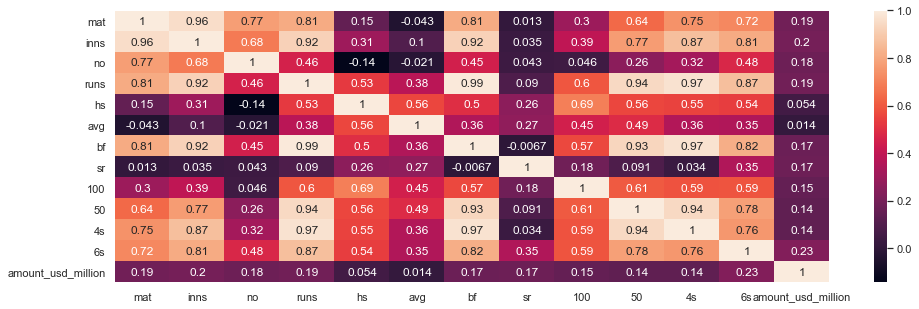

In [78]:
# numeric data
df_n=df.select_dtypes(include='number')

correlations_matrix=df_n.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show

In [79]:
X=df.drop(columns=['runs'])
y=df['runs']

# Note: we need to do train/test split before downsampling, and then only downsample the training set - Why?
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

numericalX_train   = X_train.select_dtypes(np.number)
numericalX_test    = X_test.select_dtypes(np.number)
categoricalX_train = X_train.select_dtypes(object) 
categoricalX_test  = X_test.select_dtypes(object) 

# we OneHotEncode the categoricals so we can use the same dataset to perform a regression later (in the lab).
# it is not needed for a DecisionTree or RandomForest model
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX_train)
encoded_categorical_train = encoder.transform(categoricalX_train).toarray()
encoded_categorical_train = pd.DataFrame(encoded_categorical_train, columns=encoder.get_feature_names_out()) # needed to avoid error
encoded_categorical_test = encoder.transform(categoricalX_test).toarray()
encoded_categorical_test = pd.DataFrame(encoded_categorical_test, columns=encoder.get_feature_names_out())

# we scale the numericals so we can use the same dataset to perform a regression later (in the lab).
# it is not needed for a DecisionTree or RandomForest model
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numericalX_train)
scaled_numerical_train = transformer.transform(numericalX_train)
scaled_numerical_train = pd.DataFrame(scaled_numerical_train, columns=numericalX_train.columns)
scaled_numerical_test  = transformer.transform(numericalX_test)
scaled_numerical_test  = pd.DataFrame(scaled_numerical_test, columns=numericalX_test.columns)

X_train_treated = pd.concat([scaled_numerical_train, encoded_categorical_train], axis = 1)
X_test_treated  = pd.concat([scaled_numerical_test,  encoded_categorical_test],  axis = 1)


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model_list=[LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(max_depth=2),RandomForestRegressor(max_depth=3)]

In [81]:
def run_model(models, X_train_treated, y_train,X_test_treated, y_test):
    for model in models:
        model.fit(X_train_treated, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train_treated, y_train)}, Test -> {model.score(X_test_treated, y_test)}")

In [82]:
run_model(model_list,X_train_treated,y_train,X_test_treated,y_test)

LinearRegression: Train -> 0.9992841437916599, Test -> 0.998253788526469
KNeighborsRegressor: Train -> 0.7691579784738934, Test -> 0.5825548659560023
DecisionTreeRegressor: Train -> 0.9024658640178314, Test -> 0.856132558479022
RandomForestRegressor: Train -> 0.9848585718484942, Test -> 0.9696585529546293


# Ridge regression

In [83]:
# using the alpha default value 
from sklearn.linear_model import Ridge
ridge_regression= Ridge(alpha= 0.0001)

In [84]:
ridge_regression.fit(X_train_treated,y_train)

Ridge(alpha=0.0001)

In [85]:
y_prediction= ridge_regression.predict(X_test_treated)

In [86]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("r2 score with ridge regression:", r2_score(y_test,y_prediction))
print("RMSE with ridge regression:",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score with ridge regression: 0.9982554159710145
RMSE with ridge regression: 40.57909933412736


# Lasso regression

In [87]:
from sklearn import linear_model

lasso_reg =linear_model.Lasso(alpha=0.0001)
lasso_reg.fit(X_train_treated,y_train)

C:\Users\ABHIRAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.671e+04, tolerance: 2.582e+04
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.0001)

In [88]:
print(lasso_reg.coef_)


[-2.38659272e+02  4.88857763e+02  2.58348420e+02 -6.10210613e+01
  7.78039622e+01  3.99655621e+03  1.94532300e+02  1.51272194e+02
  5.99413742e+02  1.31798327e+03  8.52750005e+02 -6.10034879e+00
  2.17394810e+01 -3.09176612e+01  3.49754023e+00 -2.47362772e+01
  1.25523806e+01 -2.37750916e+01 -1.83770378e+01  9.36667849e+00
  2.89723310e+01 -4.34285972e+00  1.48372087e+00  3.07161625e+01
  1.14447805e+00  3.25384685e+00 -7.13057252e-01 -1.71459064e+01]


In [89]:
lasso_prediction= lasso_reg.predict(X_test_treated)

In [90]:
print("r2 score for lasso regression:", r2_score(y_test,lasso_prediction))
print("RMSE for lasso regression:",np.sqrt(mean_squared_error(y_test,lasso_prediction)))

r2 score for lasso regression: 0.9982588760757993
RMSE for lasso regression: 40.53883826852141


In [92]:
lasso_prediction= lasso_reg.predict(X_test_treated)
lasso_prediction

array([1923.91006674, 1924.95584082, 3799.86276691, 1481.75391759,
       1923.19700949, 1471.48267579, 1924.24278357, 1923.89419221,
       1923.19700949, 1923.10986165, 1489.9653003 ,  717.24451025,
        609.22680315, 1907.63563879, 1924.24278357, 1507.76065372,
        573.44047972, 1907.80993447, 1421.36620739, 2780.23269554,
       1922.34140562, 1923.3871797 , 1924.41707925, 1922.17866608,
       1924.95584082, 1926.10031887, 1924.41707925, 5149.04392589,
       5083.36483432, 1924.24278357, 1923.91006674, 2918.04296686])

TypeError: unsupported operand type(s) for +: 'int' and 'function'

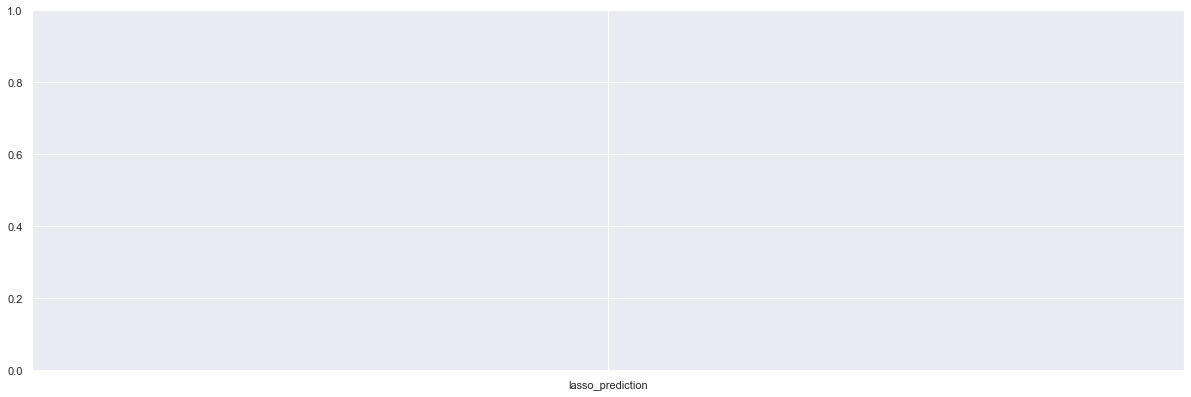

In [118]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['lasso_prediction', 'y_test']
ax.bar(model,r2_score)
plt.show()

# bowling prediction ------------------------------------------------------------------------------

In [97]:
b.shape

(307, 6)

In [98]:
s23.shape

(244, 4)

In [99]:
merged_df = pd.merge(b, s23, on='player', how='outer')
merged_df

,player,over,run,wicket,no_ball,eco,role,price,amount_usd_million
0,MohammedShami,4.0,29.0,2.0,1.0,7.3,Bowler,62500000.0,62.5
1,MohammedShami,4.0,41.0,3.0,0.0,10.3,Bowler,62500000.0,62.5
2,MohammedShami,4.0,28.0,1.0,0.0,7.0,Bowler,62500000.0,62.5
3,MohammedShami,4.0,44.0,1.0,0.0,11.0,Bowler,62500000.0,62.5
4,MohammedShami,4.0,25.0,3.0,0.0,6.3,Bowler,62500000.0,62.5
5,MohammedShami,3.0,18.0,0.0,0.0,6.0,Bowler,62500000.0,62.5
6,MohammedShami,4.0,18.0,0.0,0.0,4.5,Bowler,62500000.0,62.5
7,MohammedShami,4.0,33.0,3.0,0.0,8.3,Bowler,62500000.0,62.5
8,MohammedShami,4.0,11.0,4.0,0.0,2.8,Bowler,62500000.0,62.5
9,MohammedShami,4.0,27.0,1.0,0.0,6.8,Bowler,62500000.0,62.5


In [100]:
merged_df.shape

(508, 9)

In [101]:
merged_df.isna().sum()

player                  0
over                  201
run                   201
wicket                201
no_ball               201
eco                   201
role                   54
price                  54
amount_usd_million     54
dtype: int64

In [102]:
# Fill missing values in categorical columns with mode
categorical_columns = merged_df.select_dtypes(include=['object']).columns
merged_df[categorical_columns] = merged_df[categorical_columns].fillna(merged_df[categorical_columns].mode().iloc[0])

# Fill missing values in numerical columns with mean
numerical_columns = merged_df.select_dtypes(include=[np.number]).columns
merged_df[numerical_columns] = merged_df[numerical_columns].fillna(merged_df[numerical_columns].mean())
merged_df=merged_df.round(2)
merged_df

,player,over,run,wicket,no_ball,eco,role,price,amount_usd_million
0,MohammedShami,4.00,29.00,2.0,1.00,7.30,Bowler,62500000.0,62.50
1,MohammedShami,4.00,41.00,3.0,0.00,10.30,Bowler,62500000.0,62.50
2,MohammedShami,4.00,28.00,1.0,0.00,7.00,Bowler,62500000.0,62.50
3,MohammedShami,4.00,44.00,1.0,0.00,11.00,Bowler,62500000.0,62.50
4,MohammedShami,4.00,25.00,3.0,0.00,6.30,Bowler,62500000.0,62.50
5,MohammedShami,3.00,18.00,0.0,0.00,6.00,Bowler,62500000.0,62.50
6,MohammedShami,4.00,18.00,0.0,0.00,4.50,Bowler,62500000.0,62.50
7,MohammedShami,4.00,33.00,3.0,0.00,8.30,Bowler,62500000.0,62.50
8,MohammedShami,4.00,11.00,4.0,0.00,2.80,Bowler,62500000.0,62.50
9,MohammedShami,4.00,27.00,1.0,0.00,6.80,Bowler,62500000.0,62.50


In [103]:
merged_df.isna().sum()

player                0
over                  0
run                   0
wicket                0
no_ball               0
eco                   0
role                  0
price                 0
amount_usd_million    0
dtype: int64

In [104]:
df=merged_df.drop(['player','price'], axis = 1)
df.shape

(508, 7)

In [105]:
X=df.drop(columns=['eco'])
y=df['eco']

# Note: we need to do train/test split before downsampling, and then only downsample the training set - Why?
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

numericalX_train   = X_train.select_dtypes(np.number)
numericalX_test    = X_test.select_dtypes(np.number)
categoricalX_train = X_train.select_dtypes(object) 
categoricalX_test  = X_test.select_dtypes(object) 

# we OneHotEncode the categoricals so we can use the same dataset to perform a regression later (in the lab).
# it is not needed for a DecisionTree or RandomForest model
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX_train)
encoded_categorical_train = encoder.transform(categoricalX_train).toarray()
encoded_categorical_train = pd.DataFrame(encoded_categorical_train, columns=encoder.get_feature_names_out()) # needed to avoid error
encoded_categorical_test = encoder.transform(categoricalX_test).toarray()
encoded_categorical_test = pd.DataFrame(encoded_categorical_test, columns=encoder.get_feature_names_out())

# we scale the numericals so we can use the same dataset to perform a regression later (in the lab).
# it is not needed for a DecisionTree or RandomForest model
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numericalX_train)
scaled_numerical_train = transformer.transform(numericalX_train)
scaled_numerical_train = pd.DataFrame(scaled_numerical_train, columns=numericalX_train.columns)
scaled_numerical_test  = transformer.transform(numericalX_test)
scaled_numerical_test  = pd.DataFrame(scaled_numerical_test, columns=numericalX_train.columns)

X_train_treated = pd.concat([scaled_numerical_train, encoded_categorical_train], axis = 1)
X_test_treated  = pd.concat([scaled_numerical_test,  encoded_categorical_test],  axis = 1)


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model_list=[LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(max_depth=2),RandomForestRegressor(max_depth=3)]

In [107]:
def run_model(models, X_train_treated, y_train,X_test_treated, y_test):
    for model in models:
        model.fit(X_train_treated, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train_treated, y_train)}, Test -> {model.score(X_test_treated, y_test)}")

In [108]:
run_model(model_list,X_train_treated,y_train,X_test_treated,y_test)

LinearRegression: Train -> 0.8255932854468322, Test -> 0.8339576491061256
KNeighborsRegressor: Train -> 0.7249872161306431, Test -> 0.7468802655084574
DecisionTreeRegressor: Train -> 0.33910131964616264, Test -> 0.3488781264016524
RandomForestRegressor: Train -> 0.7229250485881525, Test -> 0.6755106392241687


# Ridge regression

In [109]:
# using the alpha default value 
from sklearn.linear_model import Ridge
ridge_regression= Ridge(alpha= 0.0001)

In [110]:
ridge_regression.fit(X_train_treated,y_train)

Ridge(alpha=0.0001)

In [111]:
y_prediction= ridge_regression.predict(X_test_treated)

In [112]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("r2 score with ridge regression:", r2_score(y_test,y_prediction))
print("RMSE with ridge regression:",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score with ridge regression: 0.8339574101889422
RMSE with ridge regression: 1.0856120196605816


In [113]:
from sklearn import linear_model

lasso_reg =linear_model.Lasso(alpha=0.0001)
lasso_reg.fit(X_train_treated,y_train)

Lasso(alpha=0.0001)

In [114]:
print(lasso_reg.coef_)


[-11.43543307  17.39186585   0.64764285   0.11972604   0.06902448
  -0.03451388   0.04254723   0.01884095   0.04332697]


In [115]:
lasso_prediction= lasso_reg.predict(X_test_treated)

In [116]:
print("r2 score for lasso regression:", r2_score(y_test,lasso_prediction))
print("RMSE for lasso regression:",np.sqrt(mean_squared_error(y_test,lasso_prediction)))

r2 score for lasso regression: 0.8339581369760006
RMSE for lasso regression: 1.0856096437351317


In [117]:
lasso_prediction

array([ 9.32185975,  9.37209081,  8.5629971 ,  9.34760479,  7.23659856,
        5.92558261,  9.34059661,  5.25903072,  9.29424996,  8.87879986,
        6.62989148, 14.60988583,  9.30608272,  9.37209081, 12.96860097,
       11.01392803, 12.9828185 ,  6.90374043, 11.80857029, 11.45919616,
        9.34760479,  9.29424996,  7.89868161,  9.19521576,  4.61719748,
        9.37127032,  5.10304809,  6.41603616,  5.59731574, 12.12195837,
        6.7461567 ,  9.3692982 ,  9.37131107,  9.29661651,  9.31890156,
        9.32876384,  9.35637363,  9.29424996,  9.34454086,  9.29424996,
        8.20685617, 13.43455202,  9.31594336,  9.37683303,  9.29740536,
       11.0126894 ,  9.27113828, 10.57559084,  8.71707437,  4.94101891,
       10.8296587 , 12.76742397,  6.73432394,  9.34997134, 13.63930055,
        7.56496758,  9.36535394,  9.51903718,  4.11228553,  9.36933894,
        9.2903057 ,  9.34760479,  9.3692982 ,  6.06380958,  9.37620064,
        9.35242937,  8.19893775,  9.37627432,  9.35943756,  8.55

In [121]:
y_test

AttributeError: 'Series' object has no attribute 'len'

TypeError: unsupported operand type(s) for +: 'int' and 'function'

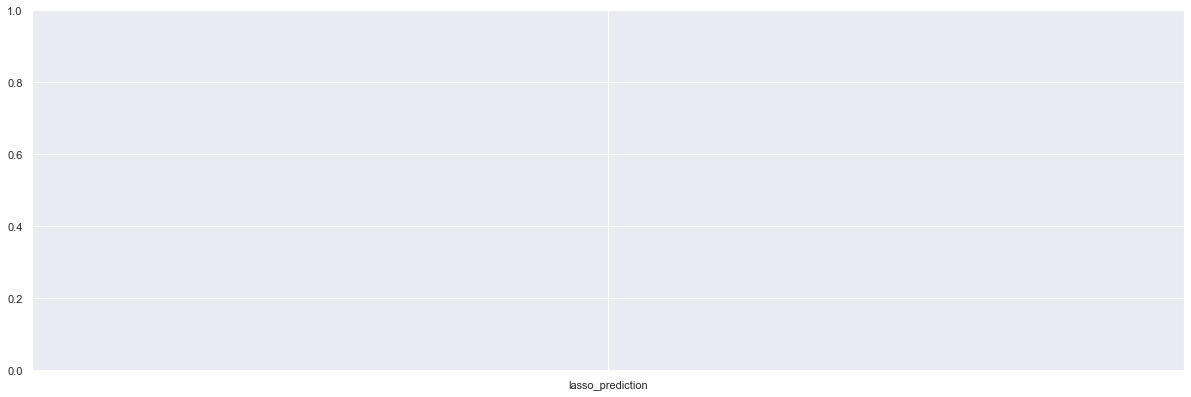

In [119]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['lasso_prediction', 'y_test']
ax.bar(model,r2_score)
plt.show()

# price

In [ ]:
p=pd.read_csv("IPL_Sold_players_2013_23.csv")
p

In [ ]:
# p=pd.read_csv("IPL_Sold_players_2013_23.csv")
p['price'] = p['Price'].str.replace(',', '').astype(int)
p=p.drop(['Price','Name'], axis=1)
# p=p.rename(columns={'Name': 'player'})
p

In [ ]:
p.shape

In [ ]:
p['Type'].value_counts()

In [ ]:


# Replace leading and trailing spaces in 'Column_Name'
p['Type'] = p['Type'].str.strip()


In [ ]:
X=p.drop(columns=['price'])
y=p['price']

# Note: we need to do train/test split before downsampling, and then only downsample the training set - Why?
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

numericalX_train   = X_train.select_dtypes(np.number)
numericalX_test    = X_test.select_dtypes(np.number)
categoricalX_train = X_train.select_dtypes(object) 
categoricalX_test  = X_test.select_dtypes(object) 

# we OneHotEncode the categoricals so we can use the same dataset to perform a regression later (in the lab).
# it is not needed for a DecisionTree or RandomForest model
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX_train)
encoded_categorical_train = encoder.transform(categoricalX_train).toarray()
encoded_categorical_train = pd.DataFrame(encoded_categorical_train, columns=encoder.get_feature_names_out()) # needed to avoid error
encoded_categorical_test = encoder.transform(categoricalX_test).toarray()
encoded_categorical_test = pd.DataFrame(encoded_categorical_test, columns=encoder.get_feature_names_out())

# we scale the numericals so we can use the same dataset to perform a regression later (in the lab).
# it is not needed for a DecisionTree or RandomForest model
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numericalX_train)
scaled_numerical_train = transformer.transform(numericalX_train)
scaled_numerical_train = pd.DataFrame(scaled_numerical_train, columns=numericalX_train.columns)
scaled_numerical_test  = transformer.transform(numericalX_test)
scaled_numerical_test  = pd.DataFrame(scaled_numerical_test, columns=numericalX_train.columns)

X_train_treated = pd.concat([scaled_numerical_train, encoded_categorical_train], axis = 1)
X_test_treated  = pd.concat([scaled_numerical_test,  encoded_categorical_test],  axis = 1)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model_list=[LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(max_depth=2),RandomForestRegressor(max_depth=3)]

In [ ]:
def run_model(models, X_train_treated, y_train,X_test_treated, y_test):
    for model in models:
        model.fit(X_train_treated, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train_treated, y_train)}, Test -> {model.score(X_test_treated, y_test)}")

In [ ]:
run_model(model_list,X_train_treated,y_train,X_test_treated,y_test)